In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

# Context
The data we will be using through the pratical classes comes from a small relational database whose schema can be seen below:
![alt text](../figures/schema.png "Relation database schema")

# Reading the Data

In [4]:
# path to database
my_path = os.path.join("..", "data", "datamining.db")

# connect to the database
conn = sqlite3.connect(my_path)

# the query
query = """
select
    age, 
    income, 
    frq, 
    rcn, 
    mnt, 
    clothes, 
    kitchen, 
    small_appliances, 
    toys, 
    house_keeping,
    dependents, 
    per_net_purchase,
    g.gender, 
    e.education, 
    m.status, 
    r.description
from customers as c
    join genders as g on g.id = c.gender_id
    join education_levels as e on e.id = c.education_id
    join marital_status as m on m.id = c.marital_status_id
    join recommendations as r on r.id = c.recommendation_id
order by c.id;
"""

df = pd.read_sql_query(query, conn)

# Metadata
- *id* - The unique identifier of the customer
- *age* - The year of birht of the customer
- *income* - The income of the customer
- *frq* - Frequency: number of purchases made by the customer
- *rcn* - Recency: number of days since last customer purchase
- *mnt* - Monetary: amount of € spent by the customer in purchases
- *clothes* - Number of clothes items purchased by the customer
- *kitchen* - Number of kitchen items purchased by the customer
- *small_appliances* - Number of small_appliances items purchased by the customer
- *toys* - Number of toys items purchased by the customer
- *house_keeping* - Number of house_keeping items purchased by the customer
- *dependents* - Binary. Whether or not the customer has dependents
- *per_net_purchase* - Percentage of purchases made online
- *education* - Education level of the customer
- *status* - Marital status of the customer
- *gender* - Gender of the customer
- *description* - Last customer's recommendation description

# Initial Analysis

Pandas user guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

Pandas 10 min tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [5]:
# dataset head
df.head(10)

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
0,1946,90782,33,66,1402,37,5,44,10,3,0,19,M,Graduation,Together,Take my money!!
1,1936,113023,32,6,1537,55,1,38,4,2,0,9,F,PhD,Divorced,Take my money!!
2,1990,28344,11,69,44,32,19,24,1,24,1,59,M,Graduation,Married,Kind of OK
3,1955,93571,26,10,888,60,10,19,6,5,1,35,F,Master,,OK nice!
4,1955,91852,31,26,1138,59,5,28,4,4,1,34,F,Graduation,Together,Take my money!!
5,1982,22386,14,65,56,47,2,48,2,1,1,67,M,PhD,Single,OK nice!
6,1969,69485,18,73,345,71,7,13,1,8,1,46,M,Graduation,Together,OK nice!
7,1960,68602,5,44,41,84,1,12,2,0,1,37,M,Graduation,Together,Horrible
8,1940,109499,30,75,1401,38,9,35,9,9,0,17,M,Graduation,Divorced,OK nice!
9,1994,23846,8,153,19,18,55,17,10,1,1,39,F,1st Cycle,Together,Meh...


In [6]:
# dataset data types
df.dtypes

age                  int64
income              object
frq                  int64
rcn                  int64
mnt                  int64
clothes              int64
kitchen              int64
small_appliances     int64
toys                 int64
house_keeping        int64
dependents          object
per_net_purchase     int64
gender              object
education           object
status              object
description         object
dtype: object

In [7]:
# count of missing values
df.isna().sum()

age                 0
income              0
frq                 0
rcn                 0
mnt                 0
clothes             0
kitchen             0
small_appliances    0
toys                0
house_keeping       0
dependents          0
per_net_purchase    0
gender              0
education           0
status              0
description         0
dtype: int64

In [9]:
# duplicated observations
df.duplicated().sum()

0

In [10]:
# descriptive statistics
df.describe(include="all").T  # try with all and without all

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,8998,NaN,NaN,NaN,1966.06,17.2966,1936,1951,1966,1981,1996
income,8998,8525,,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frq,8998,NaN,NaN,NaN,19.8481,10.9034,3,10,17,28,59
rcn,8998,NaN,NaN,NaN,62.4698,69.7618,0,26,53,79,549
mnt,8998,NaN,NaN,NaN,622.163,646.768,6,63,383,1076,3052
clothes,8998,NaN,NaN,NaN,50.4467,23.4222,1,33,51,69,99
kitchen,8998,NaN,NaN,NaN,7.03968,7.84814,0,2,4,10,75
small_appliances,8998,NaN,NaN,NaN,28.5241,12.5864,1,19,28,37,74
toys,8998,NaN,NaN,NaN,7.0369,7.92442,0,2,4,10,62
house_keeping,8998,NaN,NaN,NaN,6.92998,7.88266,0,2,4,9,77


## Problems:
- Duplicates?
- Data types?
- Missing values?
- Strange values?
- Descriptive statistics?

### Take a closer look and point out possible problems:

(hint: a missing values in pandas is represented with a NaN value)

In [ ]:
# Use this cell to further explore the dataset
# CODE HERE

In [11]:
# replace "" by nans
df.replace("", np.nan, inplace=True)

# count of missing values
df.isna().sum()

age                   0
income               46
frq                   0
rcn                   0
mnt                   0
clothes               0
kitchen               0
small_appliances      0
toys                  0
house_keeping         0
dependents          282
per_net_purchase      0
gender                0
education            47
status              177
description           0
dtype: int64

In [12]:
# check dataset data types again
df.dtypes

age                   int64
income              float64
frq                   int64
rcn                   int64
mnt                   int64
clothes               int64
kitchen               int64
small_appliances      int64
toys                  int64
house_keeping         int64
dependents          float64
per_net_purchase      int64
gender               object
education            object
status               object
description          object
dtype: object

In [ ]:
# fix wrong dtypes
# CODE HERE

In [13]:
# check descriptive statistics again
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,8998,NaN,NaN,NaN,1966.06,17.2966,1936,1951,1966,1981,1996
income,8952,NaN,NaN,NaN,69963.6,27591.6,10000,47741,70030.5,92218,140628
frq,8998,NaN,NaN,NaN,19.8481,10.9034,3,10,17,28,59
rcn,8998,NaN,NaN,NaN,62.4698,69.7618,0,26,53,79,549
mnt,8998,NaN,NaN,NaN,622.163,646.768,6,63,383,1076,3052
clothes,8998,NaN,NaN,NaN,50.4467,23.4222,1,33,51,69,99
kitchen,8998,NaN,NaN,NaN,7.03968,7.84814,0,2,4,10,75
small_appliances,8998,NaN,NaN,NaN,28.5241,12.5864,1,19,28,37,74
toys,8998,NaN,NaN,NaN,7.0369,7.92442,0,2,4,10,62
house_keeping,8998,NaN,NaN,NaN,6.92998,7.88266,0,2,4,9,77


# Visual Exploration

Matplotlib tutorials: https://matplotlib.org/3.3.1/tutorials/index.html

Matplotlib gallery: https://matplotlib.org/3.3.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py

Seaborn tutorials: https://seaborn.pydata.org/tutorial.html


Seaborn gallery: https://seaborn.pydata.org/examples/index.html

### Matplotlib vs Seaborn:
**Matplotlib** - lower level. allows to fully customize the plot appearance

**Seaborn** - higher level. Complex off-the-shelf plots with one line. Matplotlib on steroids

In [15]:
# Define metric and non-metric features. Why?
non_metric_features = ["education", "status", "gender", "dependents", "description"]
metric_features = df.columns.drop(non_metric_features).to_list()

## Pyplot-style vs Object-Oriented-style
- Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

## Numeric Variables' Univariate Distribution

In [19]:
df["age"]

0       1946
1       1936
2       1990
3       1955
4       1955
        ... 
8993    1960
8994    1975
8995    1986
8996    1938
8997    1994
Name: age, Length: 8998, dtype: int64

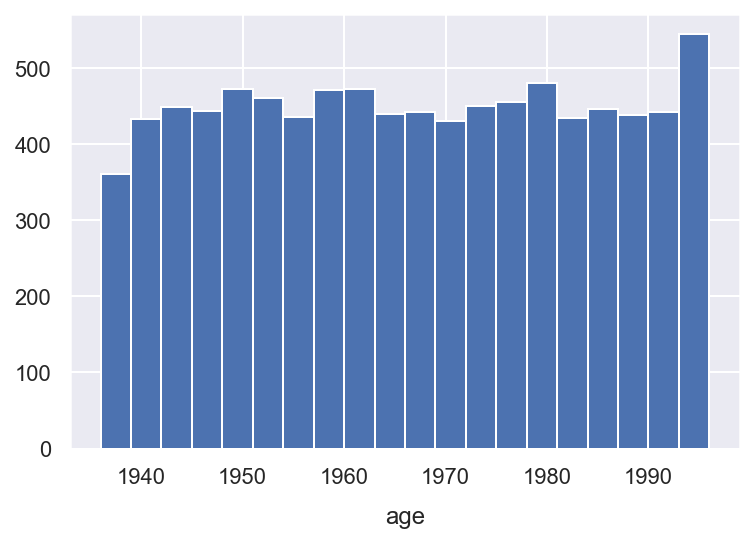

In [25]:
# Single Metric Variable Histogram
plt.hist(df["age"], bins=20)  # mess around with the bins
plt.title("age", y=-0.2)

plt.show()

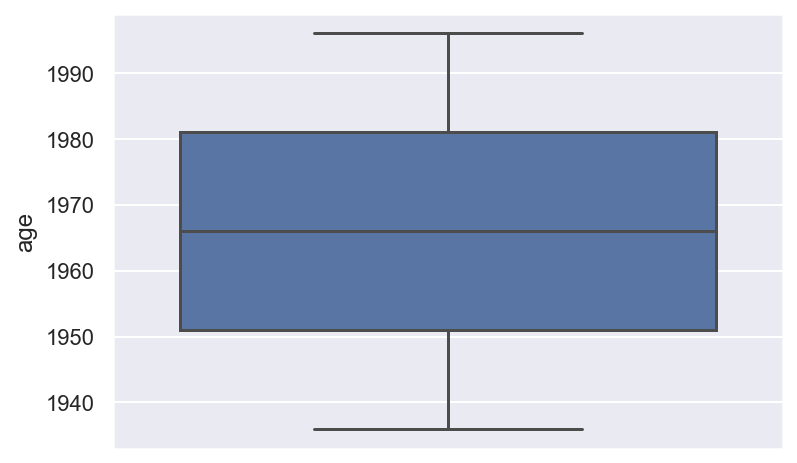

In [24]:
# Single Metric Variable Box Plot
sns.boxplot(y=df["age"])

plt.show()

What information can we extract from the plot above?

In [ ]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat i
n zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    # CODE HERE (extra: set each axis title as the feature name)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

In [27]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 13))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    # CODE HERE
    
# Layout
# Add a centered title to the figure:
title = 'Numeric Variables\' Box Plots' # notice the "\"

ax.hist(df[feat])
ax.set_title(feat)

# CODE HERE
plt.show()

IndentationError: expected an indented block (<ipython-input-27-be13b3c1b501>, line 14)

### Insights:
- univariate distributions
- potential univariate outliers

## Pairwise Relationship of Numerical Variables

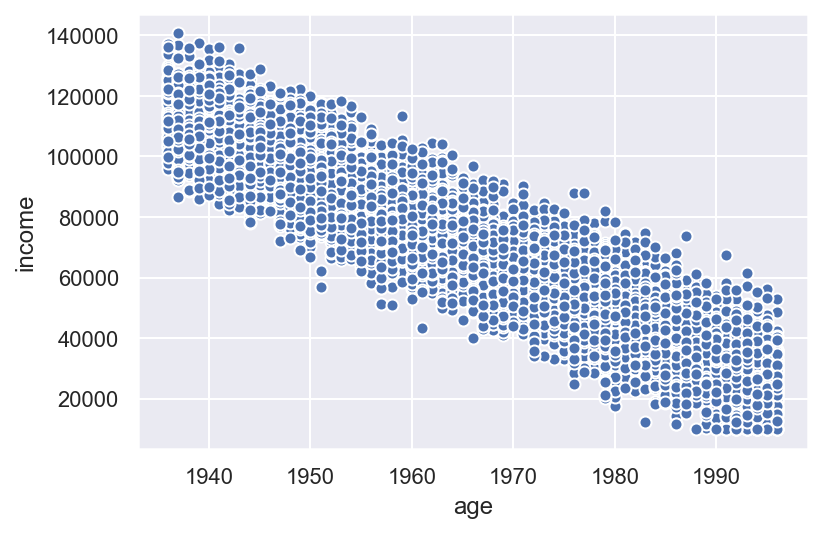

In [28]:
# Single Metric Variable Scatter plot
plt.scatter(df["age"], df["income"], edgecolors="white")
plt.xlabel("age")
plt.ylabel("income")

plt.show()

In [ ]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

### Insights:
- possible bivariate relationships
- potential bivariate outliers
- univariate distributions (diagonal)

## Categorical/Low Cardinality Variables' Absolute Frequencies

In [ ]:
# Single Non-Metric variable bar plot
sns.countplot(x=df["education"])

plt.show()

What information can we extract from the plot above?

**Using the same logic from the multiple box plot figure above, build a multiple bar plot figure for each non-metric variable:**

In [ ]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()
title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
# CODE HERE

### Insights:
- low frequency values
- high cardinality

## Metric Variables' Correlation Matrix

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = # CODE HERE

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

## Next steps on EDA:
- Coherence Check
- Outliers
- Missing values
- Feature Engineering